In [12]:
import pandas as pd
import numpy as np
from iso3166 import countries

In [27]:
wf = "wcf"

In [28]:
df = pd.read_csv(f'{wf}.csv') 
df_rank = pd.read_csv('points.csv')#, index_col=0) 

In [29]:
country_translation = {
    "MON": "MCO",
    "MAD": "MDG",
    "CRO": "HRV",
    "BUL": "BGR",
    "ZIM": "ZWE",
    "CKS": "SVK",
    "DAN": "DNK",
    "KOS": "XKX",
    "URS": "RUS",
    "GRE": "GRC",
    "CHI": "CHL",
    "SUI": "CHE",
    "NED": "NLD",
    "IRA": "IRN",
    "LIB": "LBN",
    "SLO": "SVK",
    "LAT": "LVA",
    "GER": "DEU",
    "JUG": "SRB",
    "IRE": "IRL",
    "RSA": "ZAF",
    "SPA": "ESP",
}

In [30]:
def get_alpha2_country(alpha3_name):
    return getattr(countries.get(country_translation.get(alpha3_name, alpha3_name), alpha3_name), "alpha2", "")
df.ath_country = df.ath_country.apply(get_alpha2_country)

In [31]:
for year in range(1966, 2021):

    df2020 = df[df["season"] == year]
    df2020 = df2020.dropna()

    df2020["ath_rank"]=df2020["ath_rank"].apply(lambda x: np.where(x.isdigit(),x,'0')).astype(int)

    events = df2020[["season", "date", "venue", "country", "event"]].drop_duplicates().reset_index(drop="True")
    events["key"] = 0
    skiers = df2020[["ath_name", "ath_country", "ath_id"]].drop_duplicates().reset_index(drop="True")
    skiers["key"] = 0

    cart_prod = events.merge(skiers, how='outer')

    df2020 = pd.merge(cart_prod, df2020,  how='left', left_on=["season", "date", "venue", "country", "event", "ath_name", "ath_country", "ath_id"], right_on = ["season", "date", "venue", "country", "event", "ath_name", "ath_country", "ath_id"])
    df2020 = df2020.fillna(0, downcast='infer')
    df_total = pd.merge(df2020, df_rank, on="ath_rank").sort_values(by=['date'])
    df_total["value"] = df_total.groupby(['ath_name'])["points"].cumsum()
    df_total.rename(columns={"ath_name": "name"})[["date", "name", "ath_country", "value"]].to_csv(f"{wf}_ranking_{year}.csv", index=False,)

,season,date,venue,country,event,key,ath_name,ath_country,ath_id,ath_rank,ath_time_run_1,ath_time_run_2,ath_time,ath_time_diff,ath_ski,points,value
0,2020,2019-10-27,Soelden,AUT,Giant Slalom,0,Alexis Pinturault,FR,alexis_pinturault_fra_194364,1,6710,6704,13414,0,Head,100,100
1118,2020,2019-11-24,Levi,FIN,Slalom,0,Alexis Pinturault,FR,alexis_pinturault_fra_194364,0,0,0,0,0,0,0,100
1250,2020,2019-11-30,Lake Louise,CAN,Downhill,0,Alexis Pinturault,FR,alexis_pinturault_fra_194364,0,0,0,0,0,0,0,100
1378,2020,2019-12-01,Lake Louise,CAN,Super G,0,Alexis Pinturault,FR,alexis_pinturault_fra_194364,0,0,0,0,0,0,0,100
113,2020,2019-12-06,Beaver Creek,USA,Super G,0,Alexis Pinturault,FR,alexis_pinturault_fra_194364,4,0,0,7127,37,Head,50,150
1638,2020,2019-12-07,Beaver Creek,USA,Downhill,0,Alexis Pinturault,FR,alexis_pinturault_fra_194364,0,0,0,0,0,0,0,150
589,2020,2019-12-08,Beaver Creek,USA,Giant Slalom,0,Alexis Pinturault,FR,alexis_pinturault_fra_194364,17,7836,7654,15490,365,Head,14,164
7,2020,2019-12-15,Val d'Isere,FRA,Slalom,0,Alexis Pinturault,FR,alexis_pinturault_fra_194364,1,5285,5506,10791,0,Head,100,264
2033,2020,2019-12-20,Gardena,ITA,Super G,0,Alexis Pinturault,FR,alexis_pinturault_fra_194364,0,0,0,0,0,0,0,264
263,2020,2019-12-22,Alta Badia,ITA,Giant Slalom,0,Alexis Pinturault,FR,alexis_pinturault_fra_194364,8,5889,5936,11825,92,Head,32,296


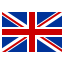

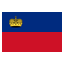

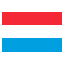

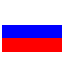

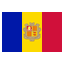

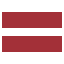

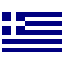

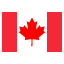

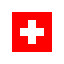

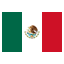

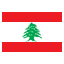

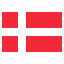

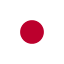

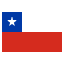

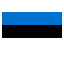

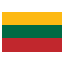

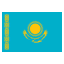

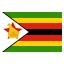

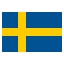

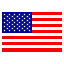

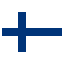

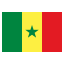

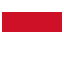

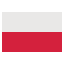

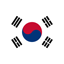

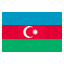

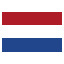

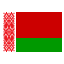

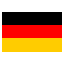

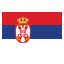

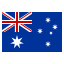

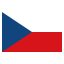

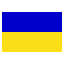

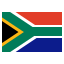

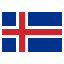

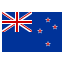

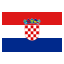

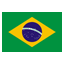

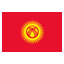

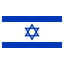

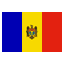

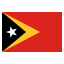

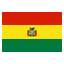

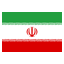

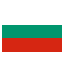

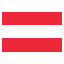

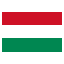

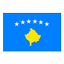

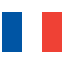

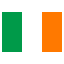

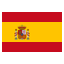

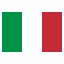

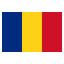

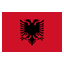

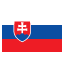

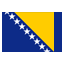

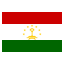

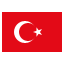

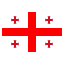

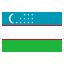

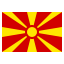

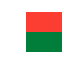

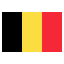

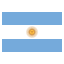

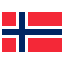

In [6]:
from PIL import Image
import requests
from io import BytesIO
for country in set(df.ath_country.tolist()):
    if country != "":
        response = requests.get(f"https://www.countryflags.io/{country}/flat/64.png")
        img = Image.open(BytesIO(response.content))
        display(img)